# Supplement Notebook 1 
Figure panels for UCSF-Biohub COVID Tissue Atlas. <br>
Nov 2021 <br>
Authors: Alejandro Granados, Ann Chen <br>

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc
import scvi
import sys
import matplotlib as mpl
import os 
#add path where utils.py will be called
sys.path.append('/mnt/ibm_lg/covid_tissue_atlas/CovidTissueAtlas/cta_utils/')
import utils
import viz_utils
from matplotlib import cm



# Notebook parameters 
this_sample ='liver'
FIG_DIR = viz_utils.setup_fig_params(this_sample )

# Location of organ h5ad 
MASTER_DIR = '/mnt/ibm_lg/covid_tissue_atlas/data/tissue_objects/all_tissues/portal/v1/'
sc.settings.verbosity = 3            
sc.set_figure_params(dpi=150)
sc.settings.figdir = FIG_DIR




package versions:
matplotlib 3.3.1
scanpy 1.7.2


In [2]:
FIG_DIR

'/mnt/ibm_lg/covid_tissue_atlas/figures/figure2/liver/'

Make UMAPs and save pdf 

In [2]:
adata = sc.read_h5ad(MASTER_DIR + 'CTA_' + this_sample + '.h5ad')

In [14]:
from matplotlib.pyplot import rc_context
viz_utils.set_plotting_style() 

def makeUMAP(adata =[], FIG_DIR ="", this_sample=""):
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42

    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(4.5,8))

    n_cells  = adata.X.shape[0]

    sc.pl.umap(adata, color='disease_status', add_outline=True, legend_loc='right margin',
                   legend_fontsize=12, legend_fontoutline=2,frameon=False,
                   title='COVID Tissue Atlas', palette='Spectral',
                   ax=ax[0], show = False)

    sc.pl.umap(adata, color='cell_type_annotation', add_outline=True,
                   legend_fontsize=7, legend_fontoutline=1,frameon=False,
                   title= f'{this_sample}, {n_cells} cells', palette='Set3', 
                   ax = ax[1])

    fig.savefig(FIG_DIR + this_sample + '_umaps.svg', dpi=400, bbox_inches='tight', transparent=True)
    plt.show() 

## Cell type populations

In [52]:
viz_utils.set_plotting_style() 

def celltypeBarplots(adata = [], cell_type_label = 'short_cell_type', 
                     FIG_DIR = "", 
                     group_var1 = 'disease_status', donor_col = 'sampleID',
                     this_sample = '', ax  =[]): 

    
    stacked_df = adata.obs[[group_var1 , cell_type_label]]
    cluster_disease = stacked_df.pivot_table(index=cell_type_label, columns=[group_var1 ], aggfunc='size')
    cluster_disease_pct = cluster_disease.div(cluster_disease.sum(axis=0), axis=1) * 100
    organs_covid = cluster_disease_pct.sort_values(by ="Cov19", ascending = False )


    
    # set plot style: grey grid in the background:
    sns.set(style="whitegrid")

    # set the figure size
    df = adata.obs
    # top bar -> sum all values(smoker=No and smoker=Yes) to find y position of the bars
    stacked_df = adata.obs[[donor_col, cell_type_label]]
    cluster_disease = stacked_df.pivot_table(index = donor_col, columns= cell_type_label, aggfunc='size')
    sorted_donors = cluster_disease.sum(axis = 1).sort_values()

    # Panel A 
    cmap = cm.get_cmap('Spectral') # Colour map (there are many others)
    #ax[0].set_xscale('log')

  
    # Panel A 
    cmap = cm.get_cmap('Spectral') # Colour map (there are many others)

    organs_covid.plot(kind='barh', stacked=False, 
                         colormap=cmap,
                         grid = False,ax = ax[0])

    plt.tight_layout()

    fig.savefig(FIG_DIR + 'barplots_celltype'+ this_sample+'.png', dpi=300, bbox_inches='tight', transparent=True)

    plt.show() 
 

In [7]:
FIG_DIR 

'/mnt/ibm_lg/covid_tissue_atlas/figures/figure2/liver/'

### Plot all UMAP organs 

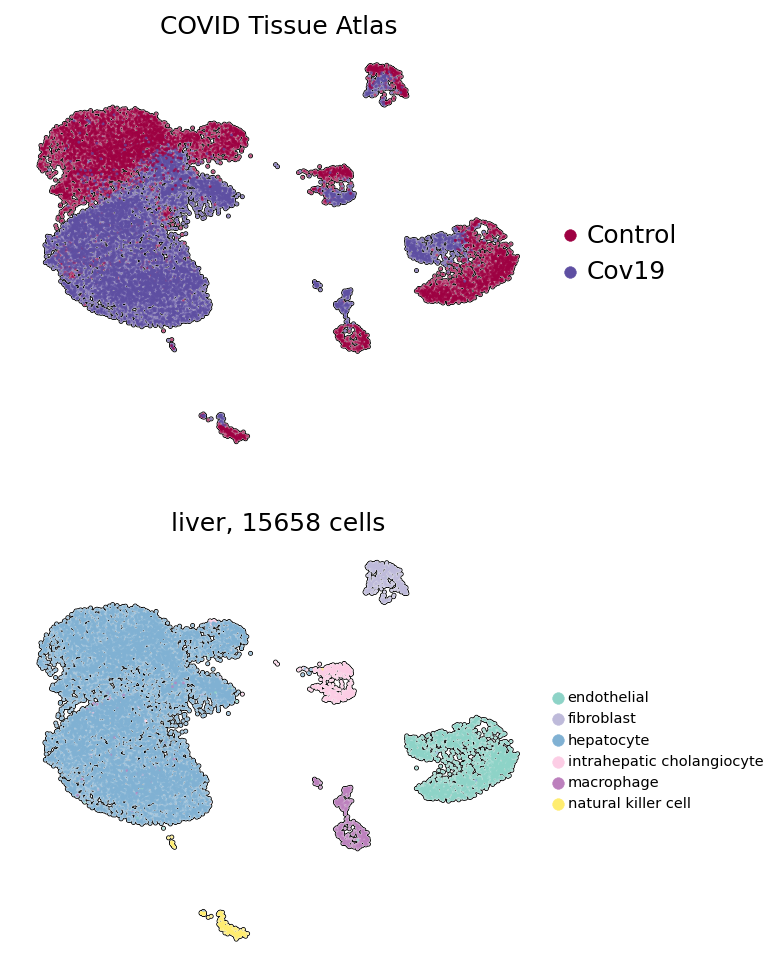

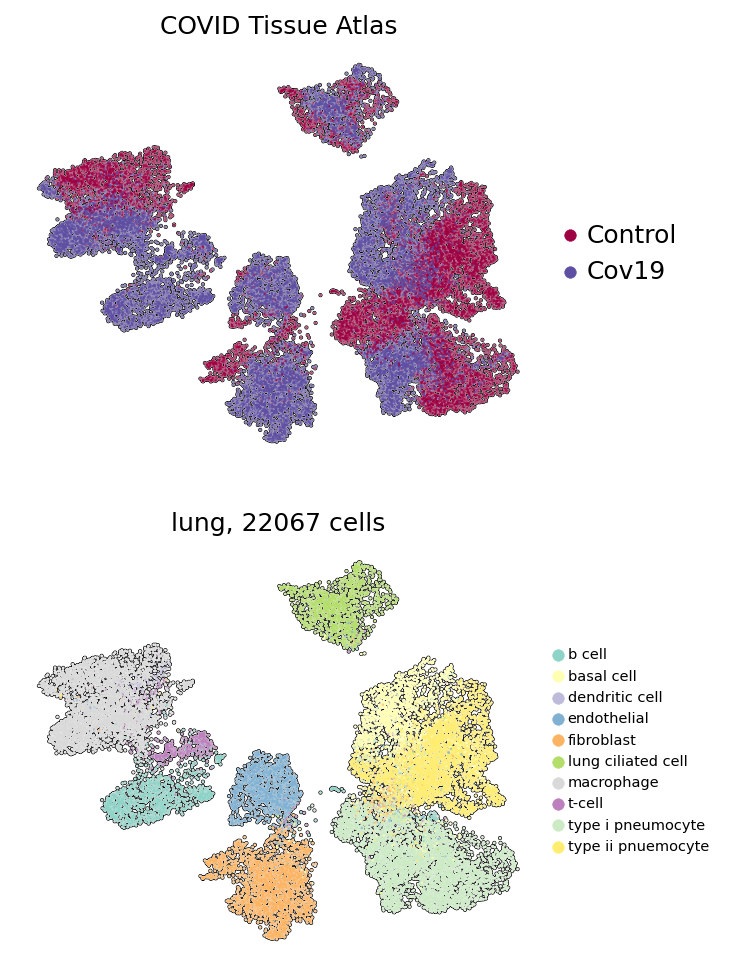

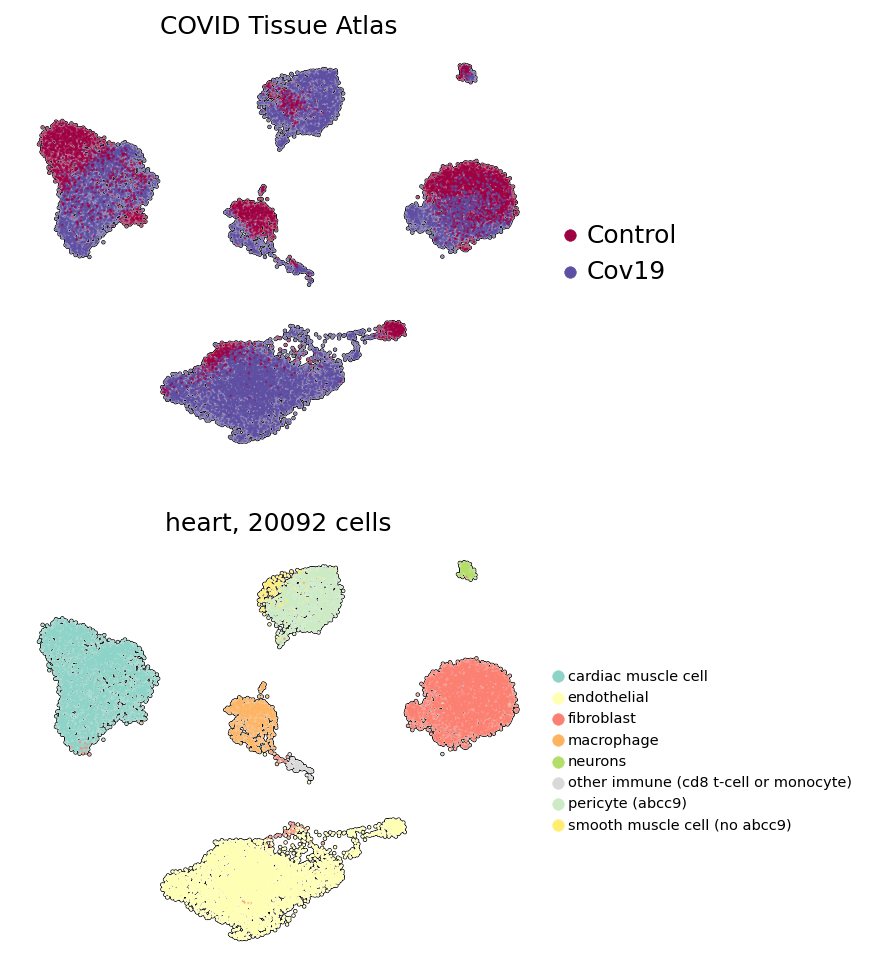

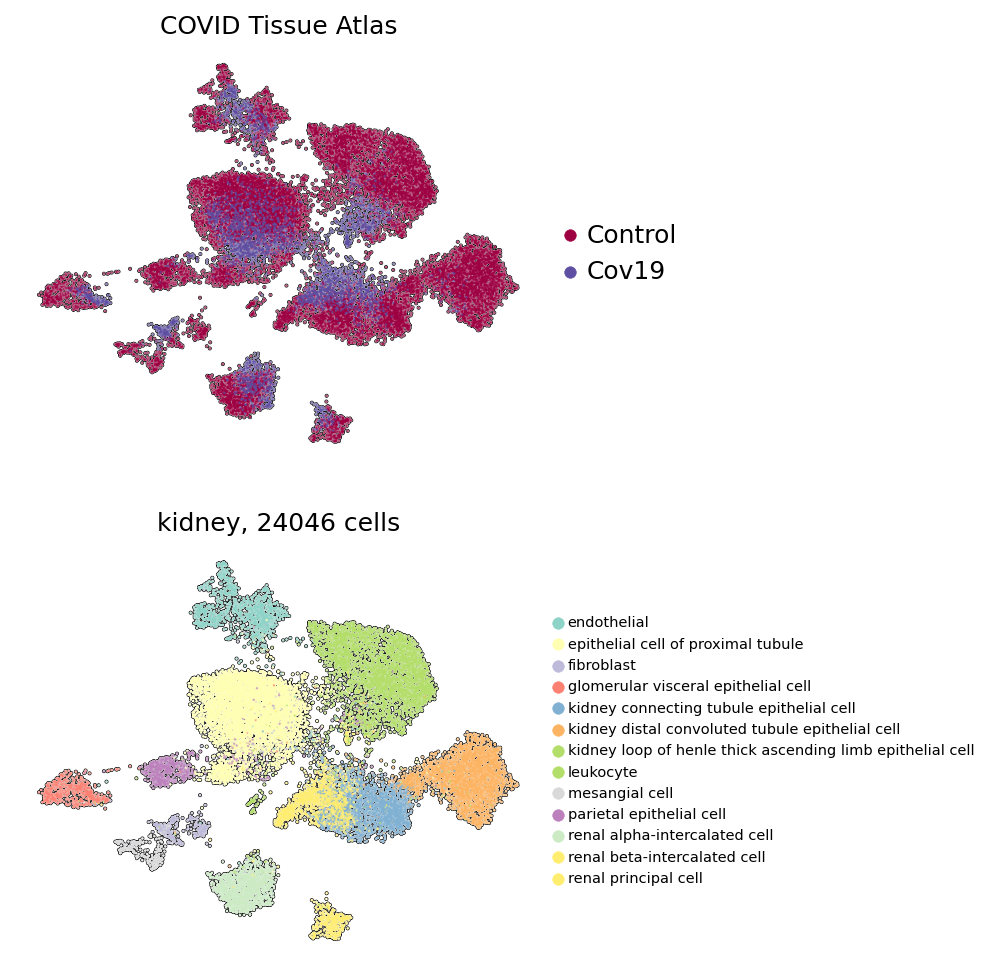

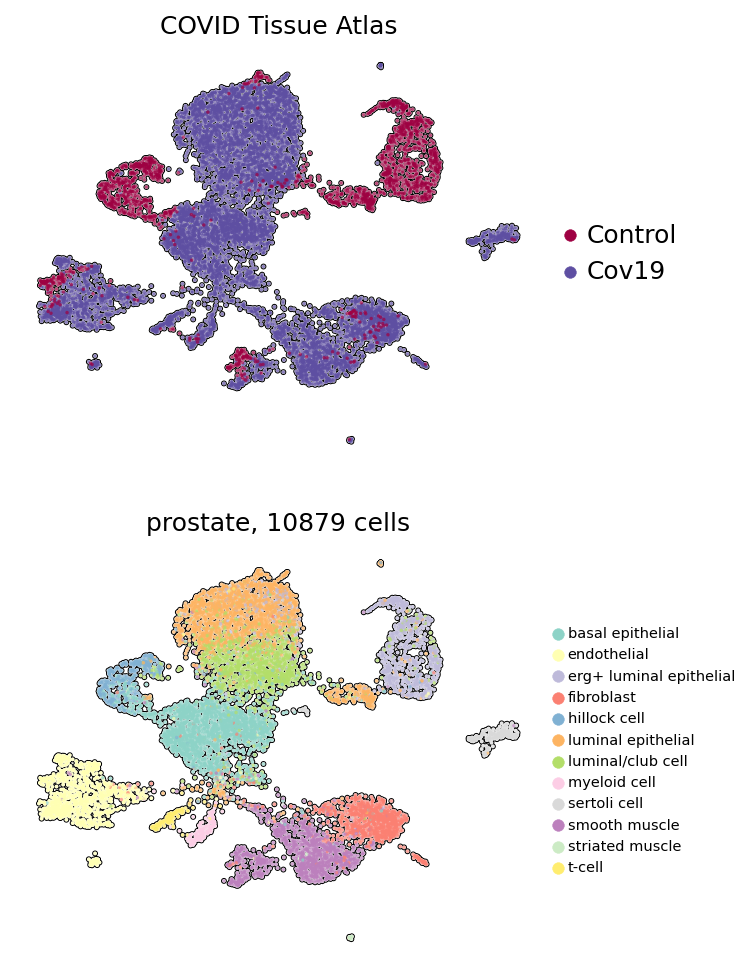

In [16]:
samples = ['liver','lung','heart','kidney','prostate']
# 1. Load tissue object 
for s in samples: 
    FIG_PATH = '/mnt/ibm_lg/covid_tissue_atlas/figures/figure2/' + s + '/'
    adata = sc.read_h5ad(MASTER_DIR + 'CTA_' + s + '.h5ad')
    # 2. Make UMAPs
    makeUMAP(adata, FIG_DIR =FIG_PATH, this_sample =  s)
    # 3. Make barplots 


Fix donor column for all objects 

In [37]:
samples = ['liver','lung','heart','kidney','prostate']
# 1. Load tissue object 
for s in samples: 
    FIG_PATH = '/mnt/ibm_lg/covid_tissue_atlas/figures/figure2/' + s + '/'
    adata = sc.read_h5ad(MASTER_DIR + 'CTA_' + s + '.h5ad')
    # 2. Make barplots 
    if not 'sampleID' in adata.obs.columns:
        if '10X_run' in adata.obs.columns: 
            adata.obs['sampleID'] = adata.obs['10X_run']
        elif 'donorID' in adata.obs.columns:
            adata.obs['sampleID'] = adata.obs['donorID']
    
    adata.write(MASTER_DIR + 'CTA_' + s + '_.h5ad')


## Barplots for all tissues 

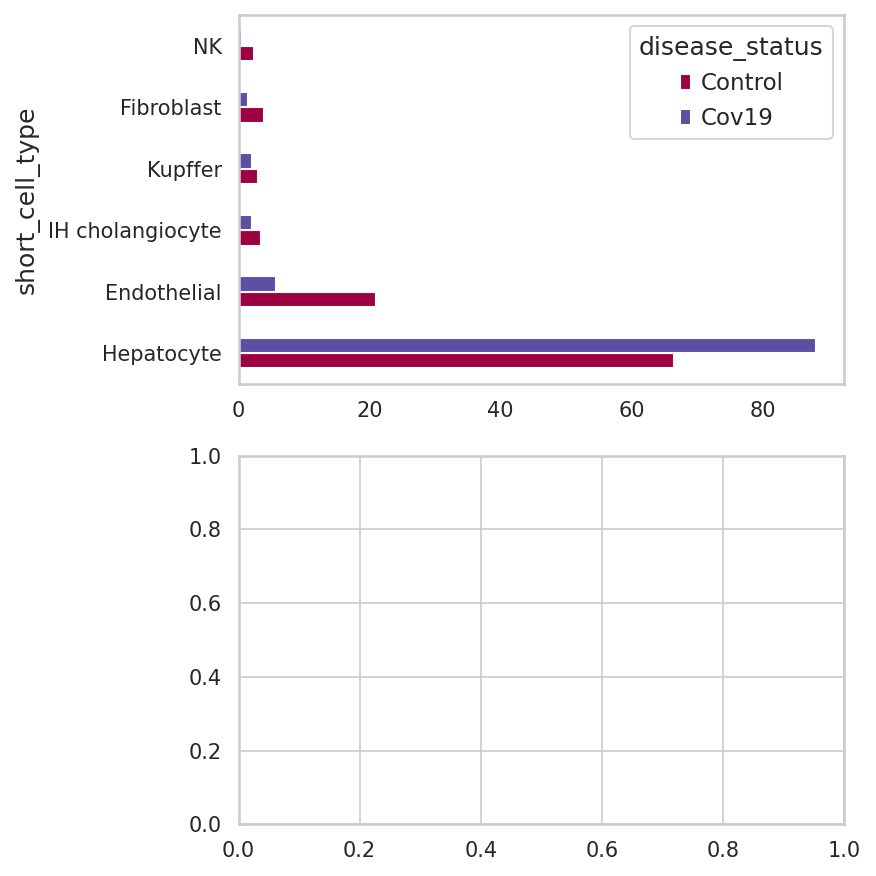

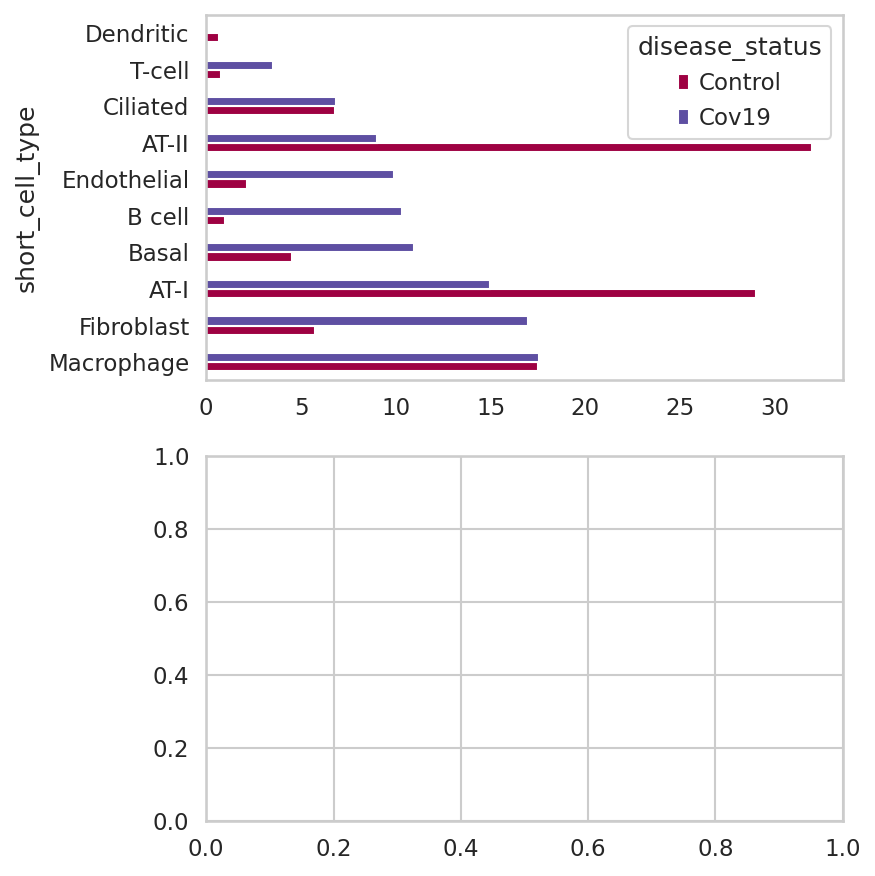

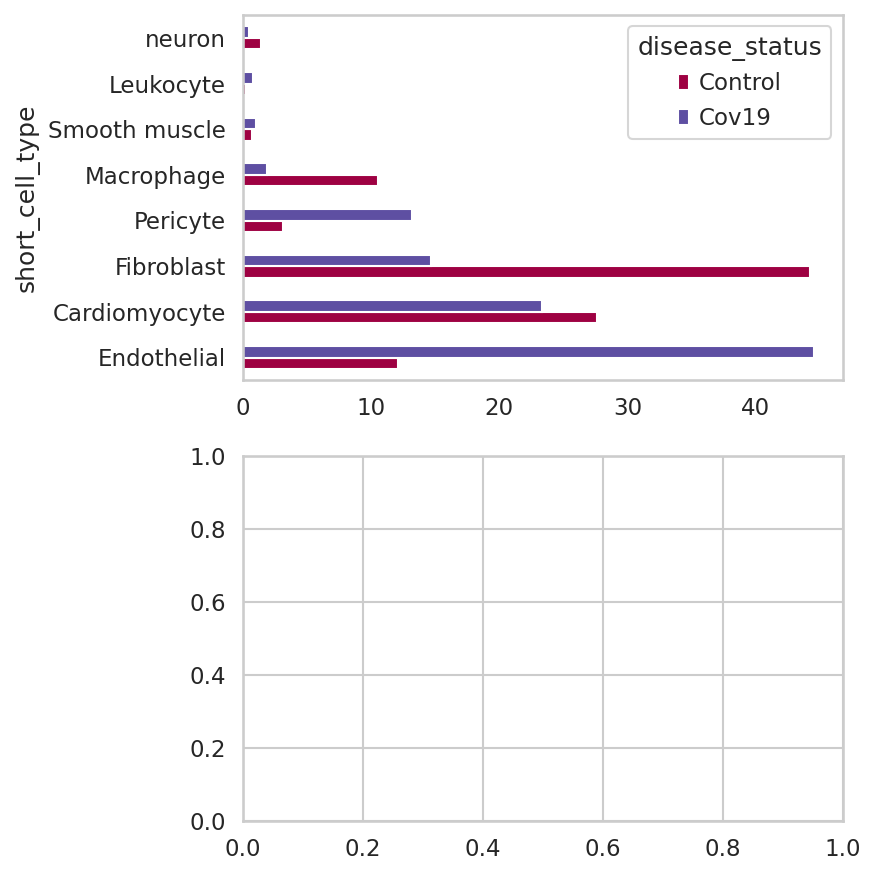

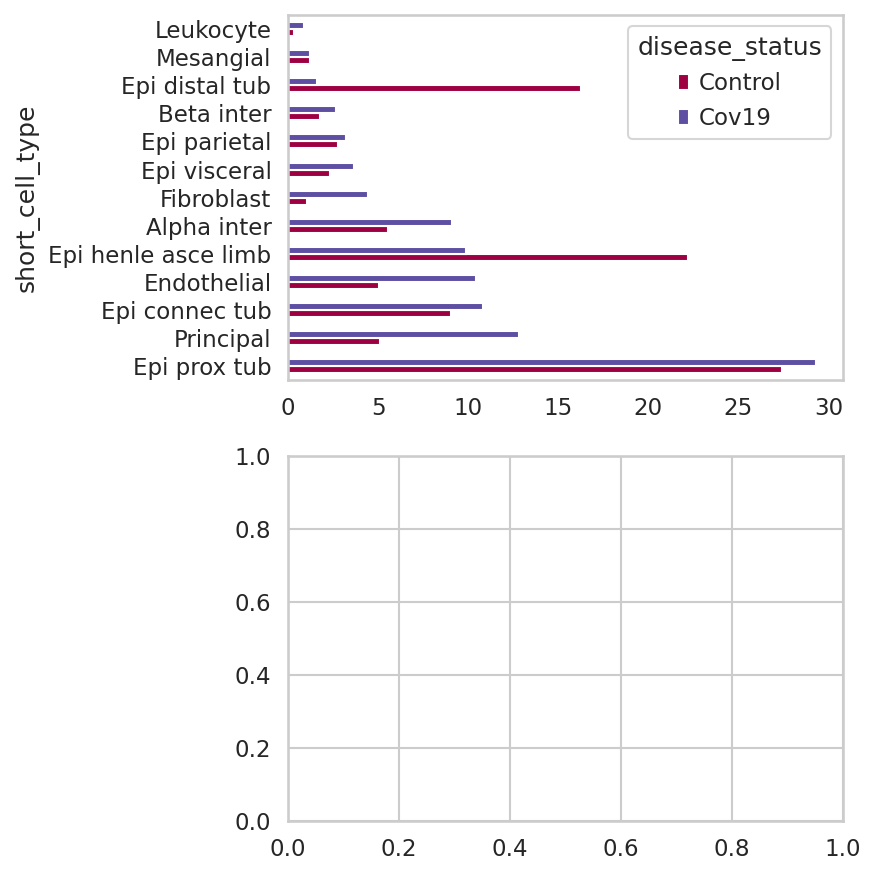

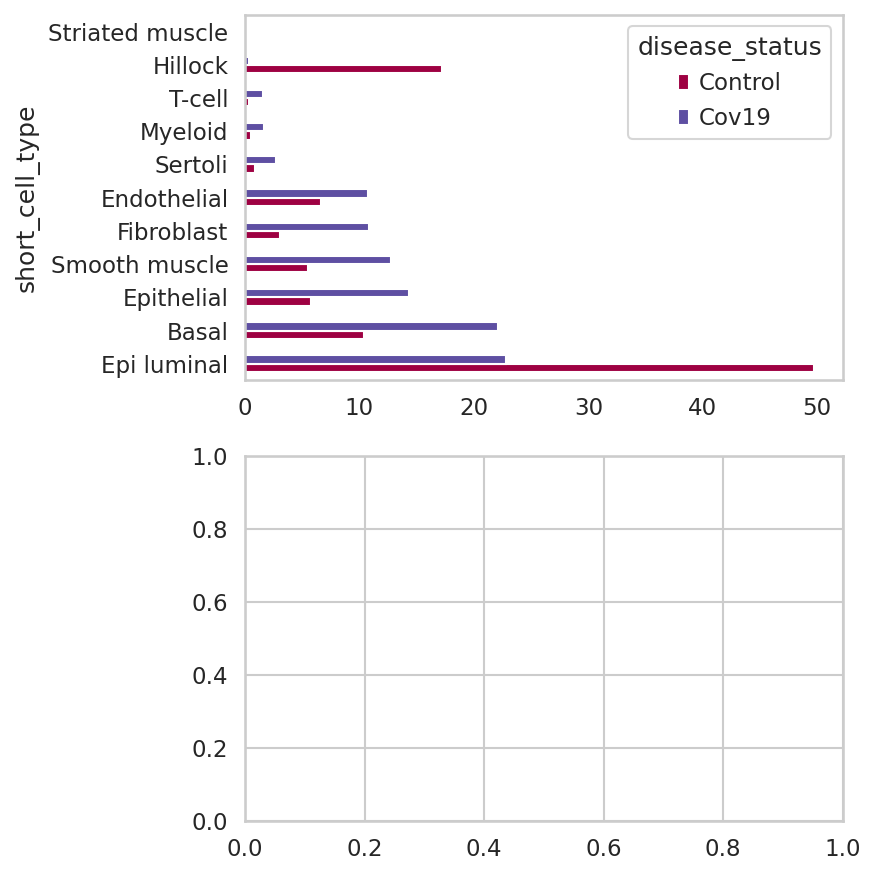

In [53]:
samples = ['liver','lung','heart','kidney','prostate']
# 1. Load tissue object 
for s in samples: 
    FIG_PATH = '/mnt/ibm_lg/covid_tissue_atlas/figures/figure2/' + s + '/'
    adata = sc.read_h5ad(MASTER_DIR + 'CTA_' + s + '_.h5ad')
    # 2. Make barplots 
    #set_plotting_style() 

    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42

    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6,6), dpi = 150)

        
    celltypeBarplots(adata, cell_type_label = 'short_cell_type', 
                     FIG_DIR = FIG_PATH, 
                     group_var1 = 'disease_status', donor_col = 'sampleID', this_sample = s, ax = ax)
    # 3. Make barplots 


### UMAP by donor

In [72]:
FIG_PATH

'/mnt/ibm_lg/covid_tissue_atlas/figures/figure2/prostate/'

In [75]:
def makeUMAP_Donor(adata =[], FIG_DIR ="", this_sample=""):
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42

    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(4.5,8))

    n_cells  = adata.X.shape[0]

    sc.pl.umap(adata, color='sampleID', add_outline=True, legend_loc='right margin',
                   legend_fontsize=12, legend_fontoutline=2,frameon=False,
                   title='Atlas donor', palette='Paired',
                   ax=ax[0], show = False)

    sc.pl.umap(adata, color='cell_type_annotation', add_outline=True,
                   legend_fontsize=7, legend_fontoutline=1,frameon=False,
                   title= f'{this_sample}, {n_cells} cells', palette='Set3', 
                   ax = ax[1])

    fig.savefig(FIG_DIR + this_sample + '_umapsDonor.svg', dpi=400, bbox_inches='tight', transparent=True)
    plt.show() 

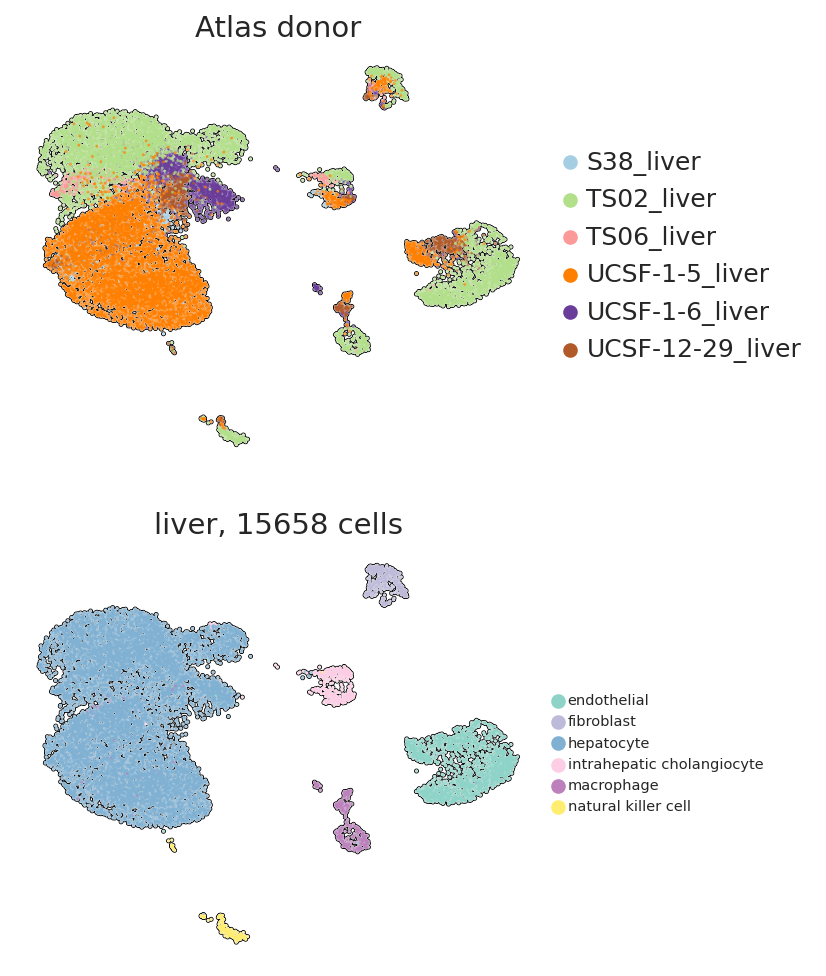

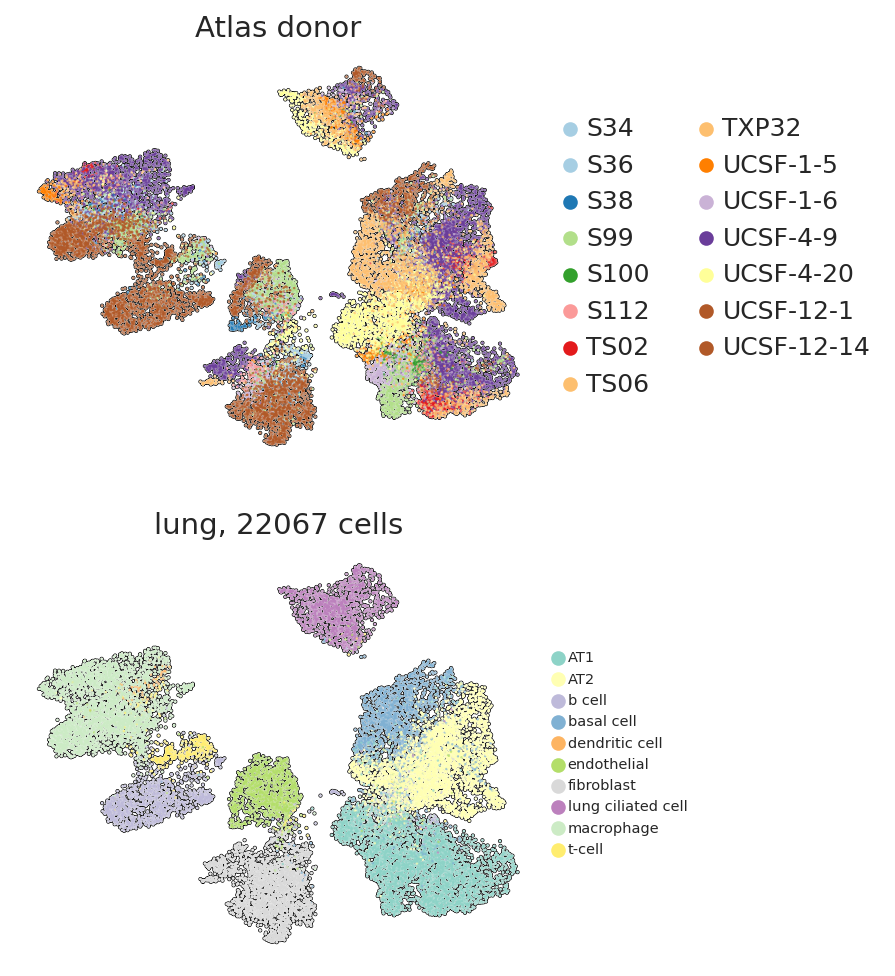

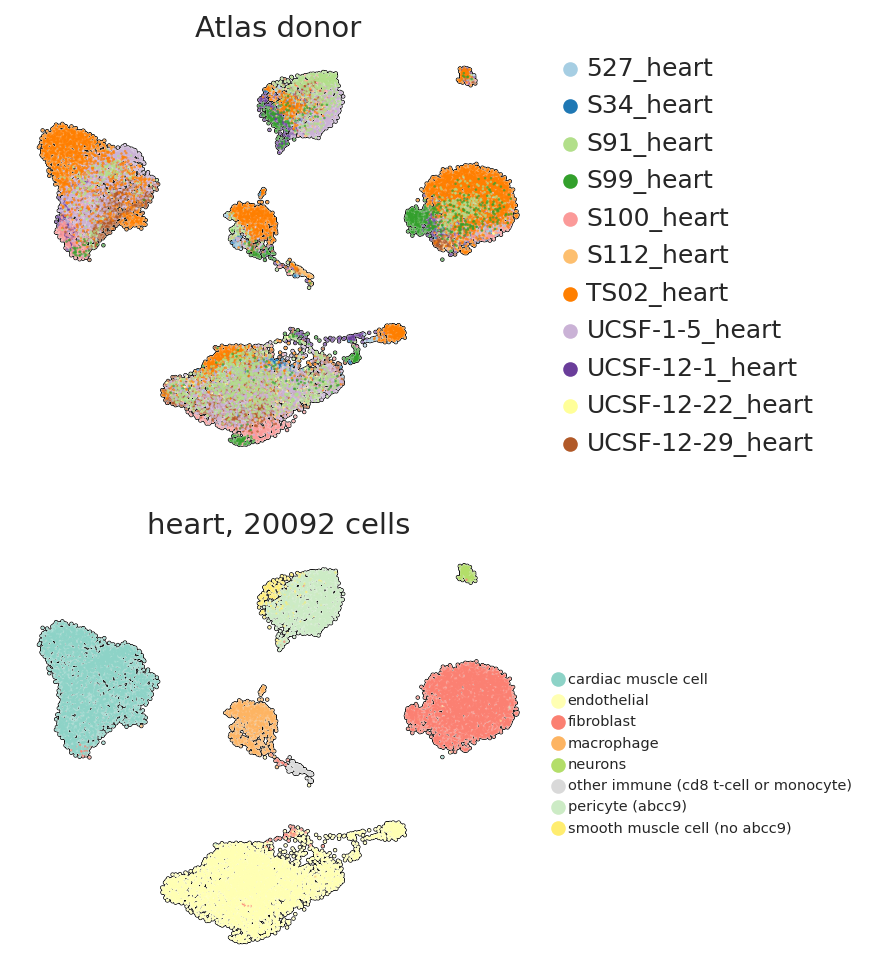

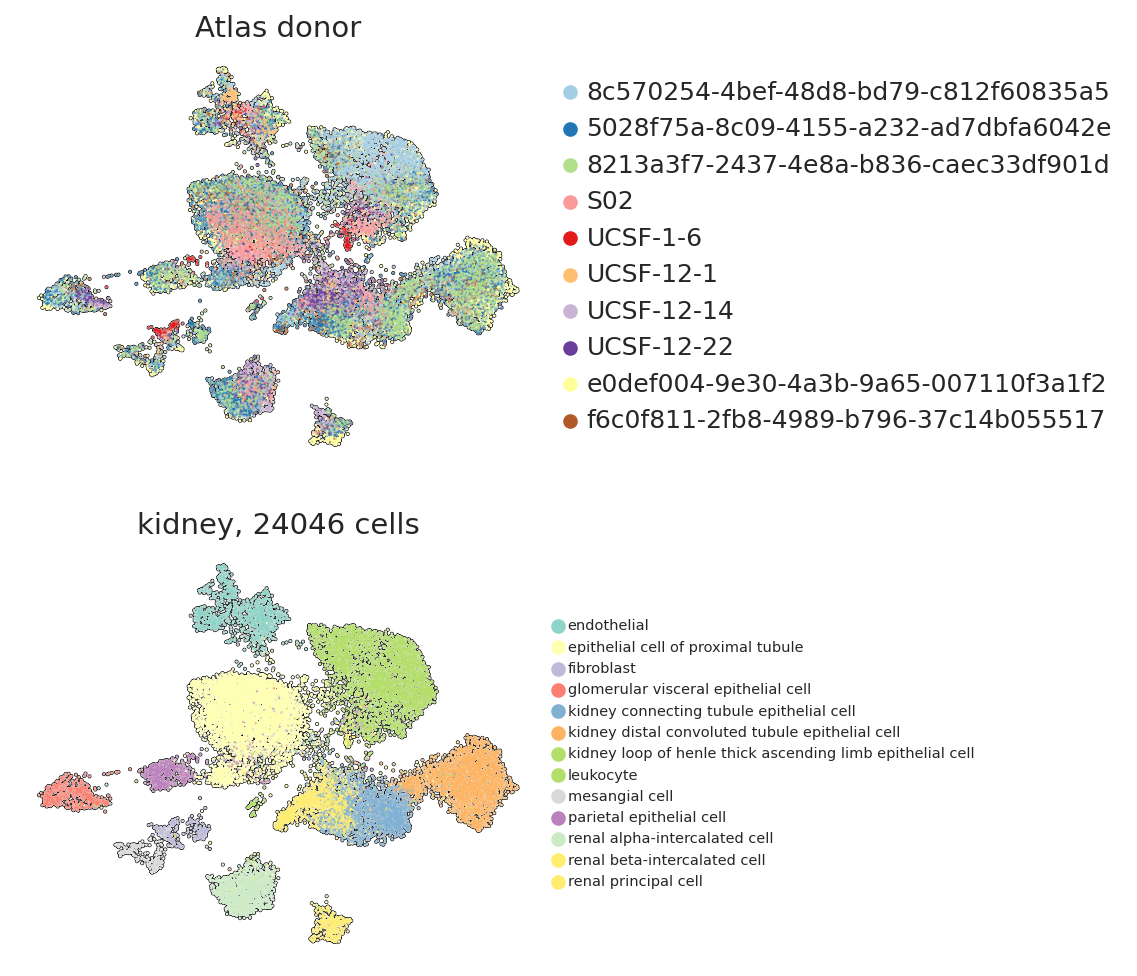

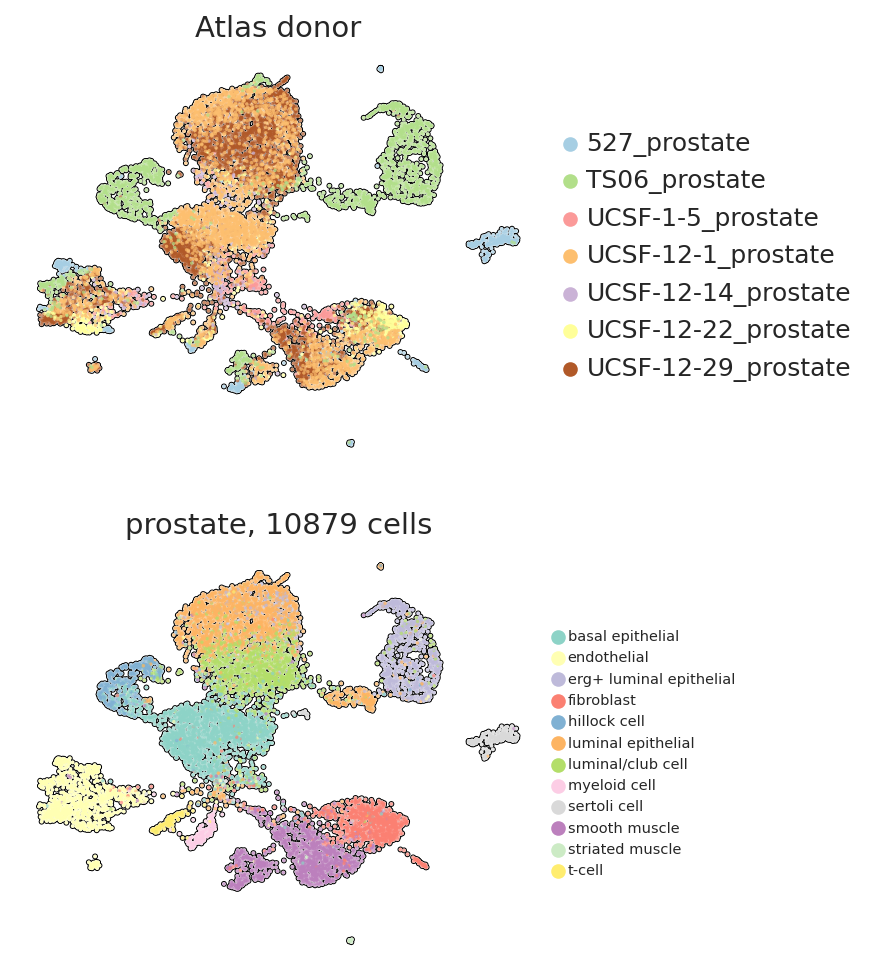

In [76]:
samples = ['liver','lung','heart','kidney','prostate']
# 1. Load tissue object 
for s in samples: 
    FIG_PATH = '/mnt/ibm_lg/covid_tissue_atlas/figures/figure2/' + s + '/'
    adata = sc.read_h5ad(MASTER_DIR + 'CTA_' + s + '_.h5ad')
    # 2. Make UMAPs
    makeUMAP_Donor(adata, FIG_DIR =FIG_PATH, this_sample =  s)
    # 3. Make barplots 


## Expression of COVID genes 

Storing dendrogram info using `.uns['dendrogram_short_cell_type']`
categories: Endothelial, Fibroblast, Hepatocyte, etc.
var_group_labels: Entry genes, Entry receptors, Entry proteases


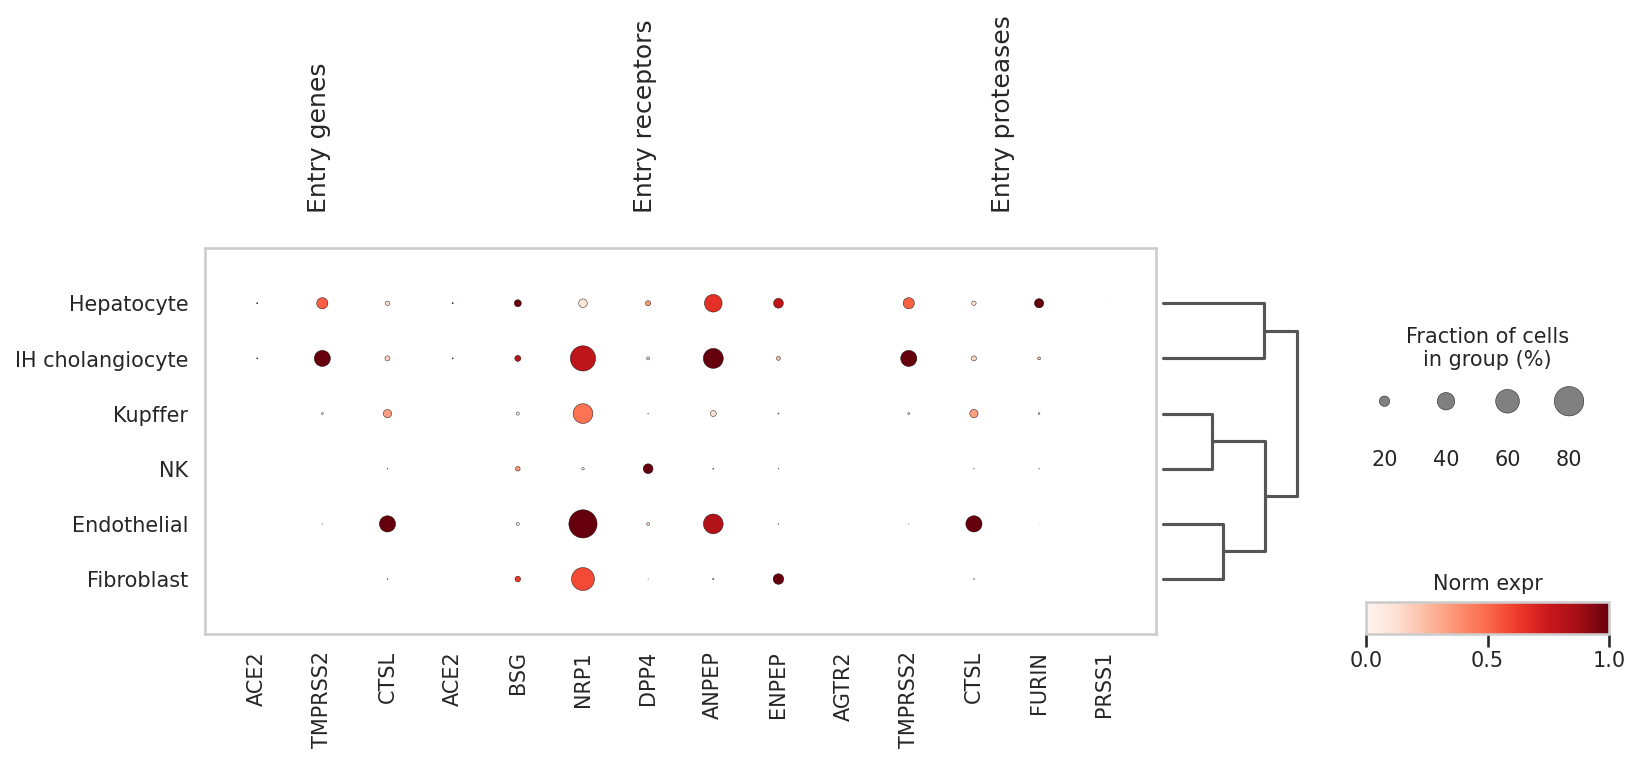

Storing dendrogram info using `.uns['dendrogram_short_cell_type']`
categories: AT-I, AT-II, B cell, etc.
var_group_labels: Entry genes, Entry receptors, Entry proteases


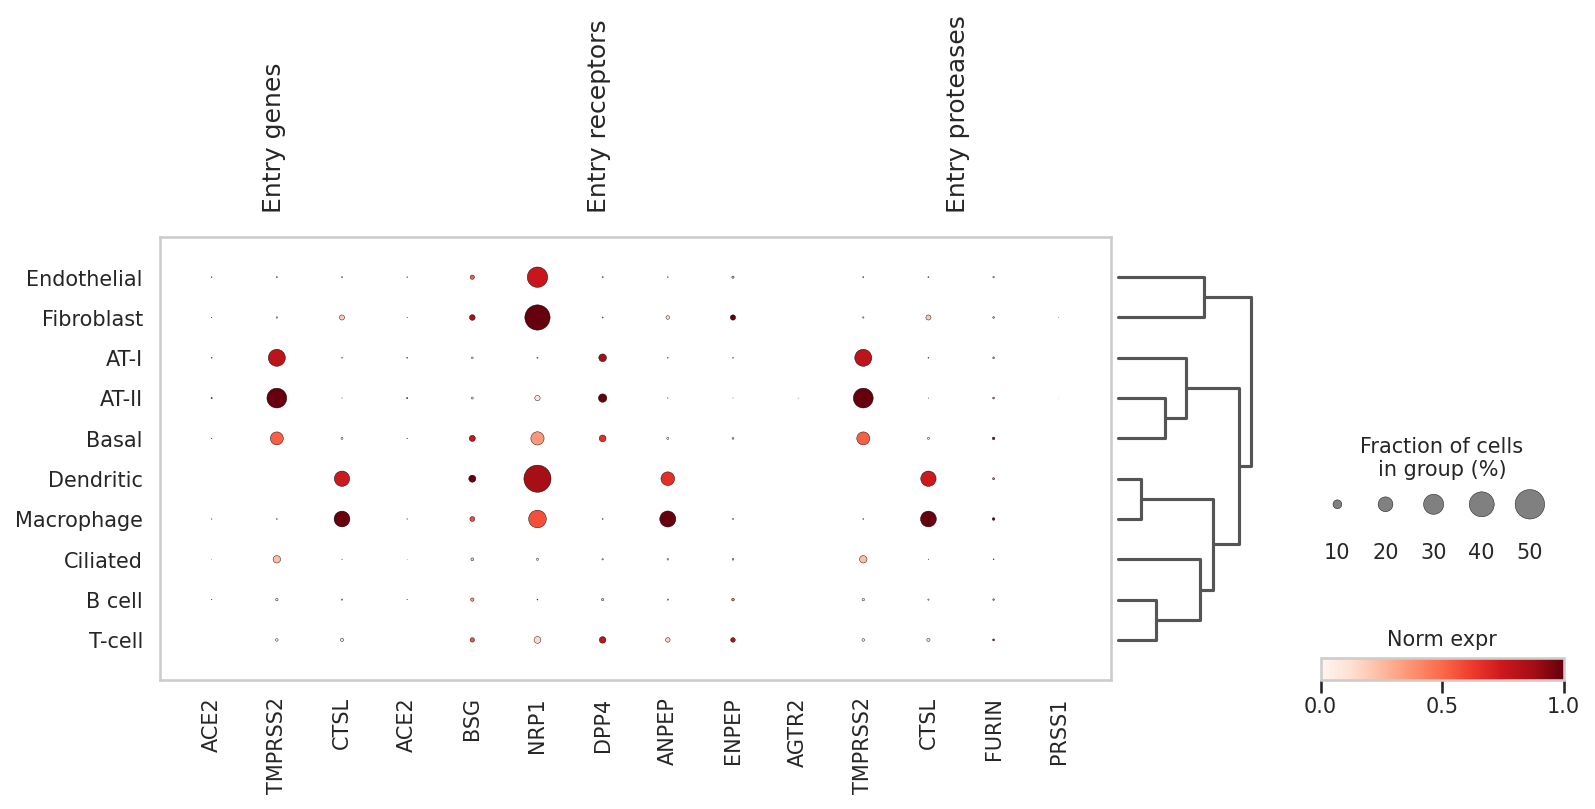

Storing dendrogram info using `.uns['dendrogram_short_cell_type']`
categories: Cardiomyocyte, Endothelial, Fibroblast, etc.
var_group_labels: Entry genes, Entry receptors, Entry proteases


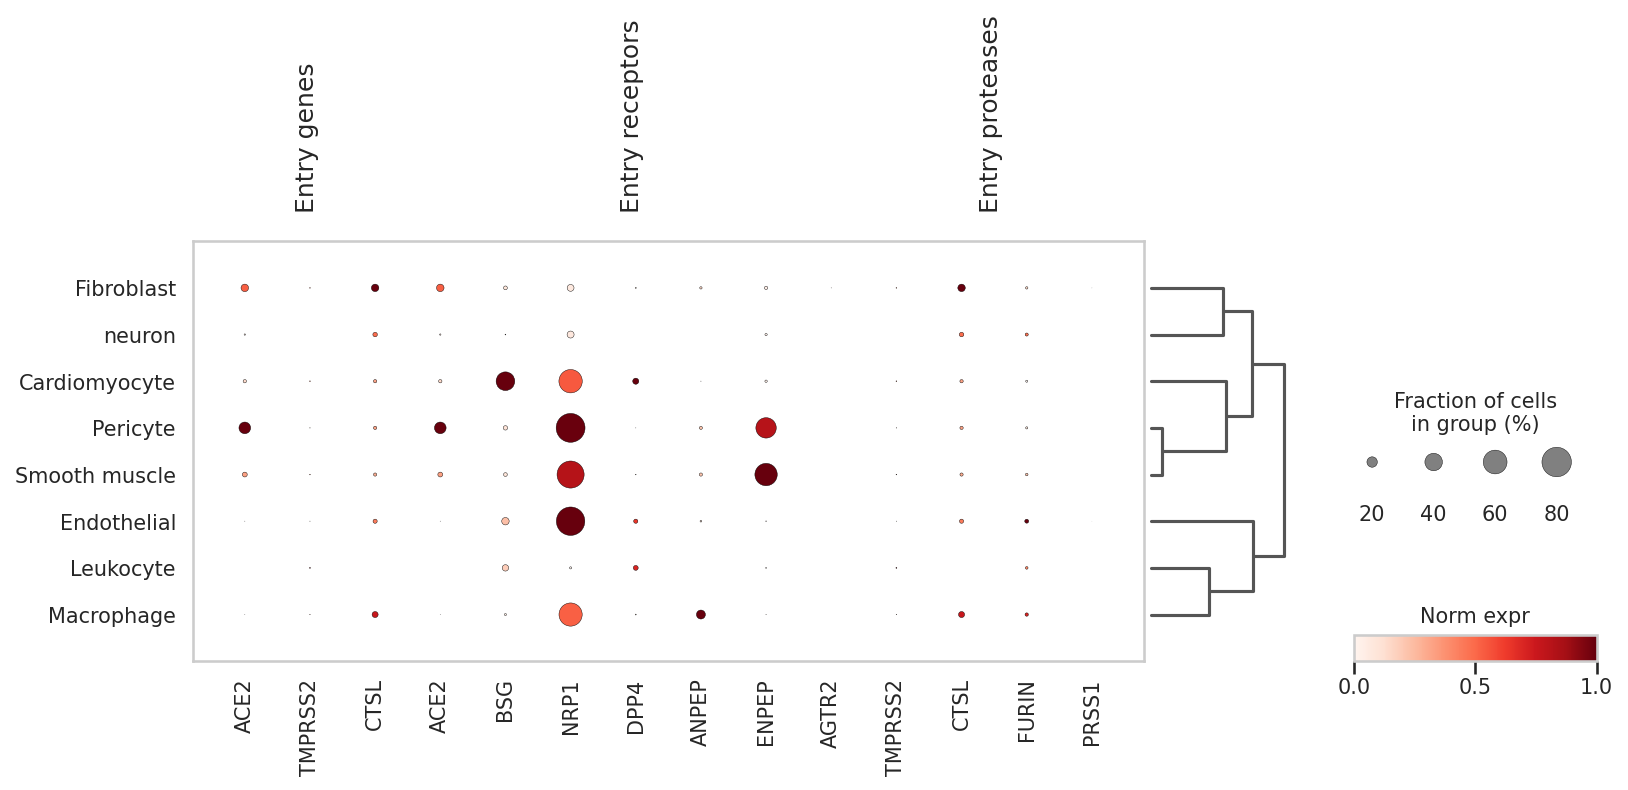

Storing dendrogram info using `.uns['dendrogram_short_cell_type']`
categories: Alpha inter, Beta inter, Endothelial, etc.
var_group_labels: Entry genes, Entry receptors, Entry proteases


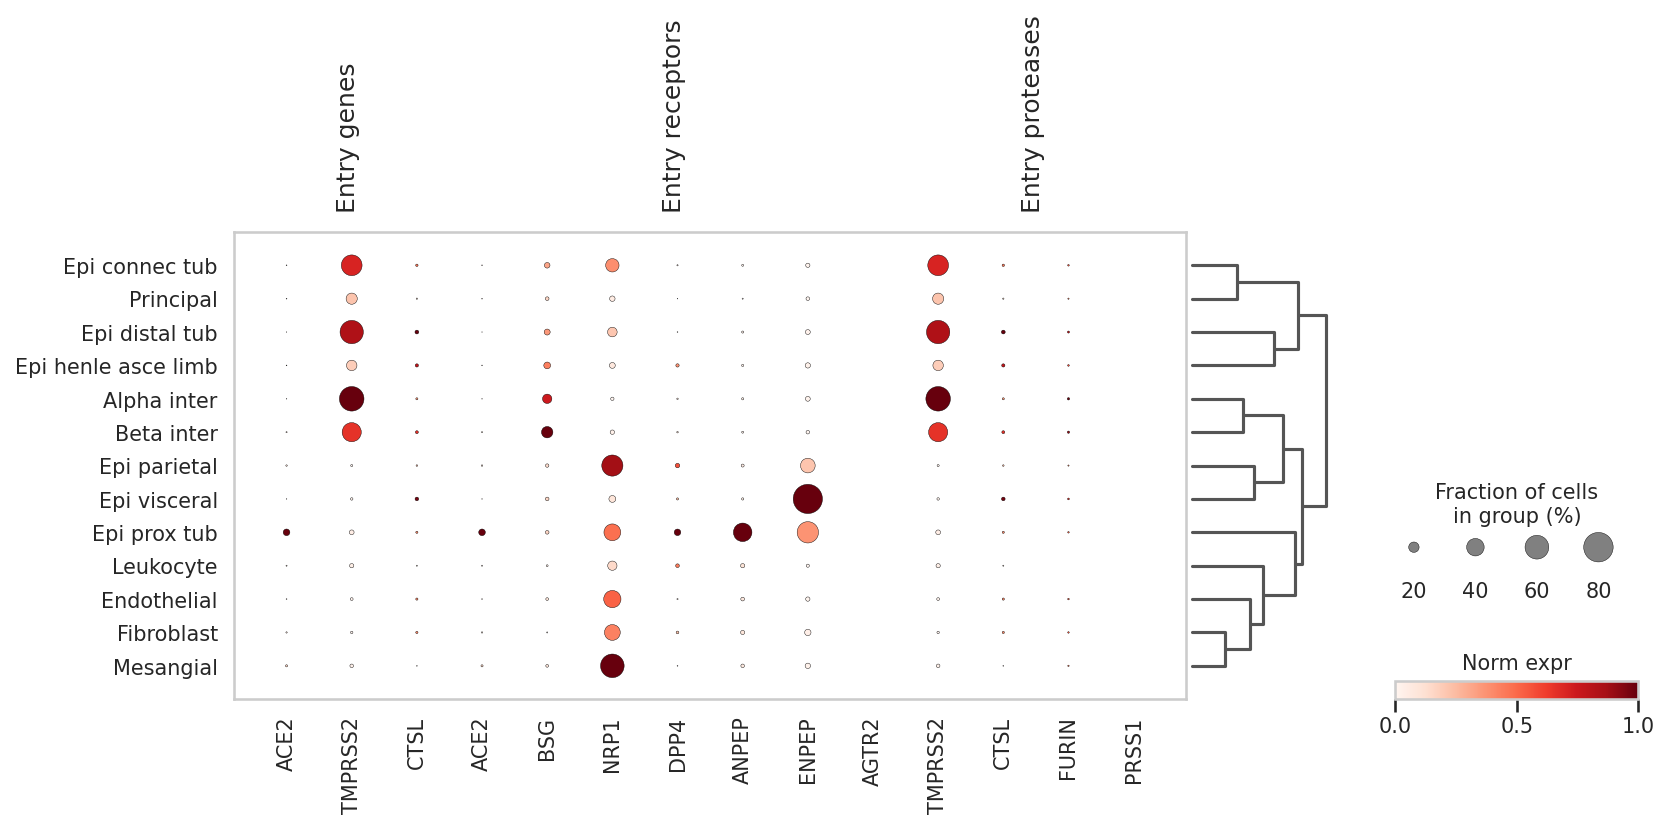

Storing dendrogram info using `.uns['dendrogram_short_cell_type']`
categories: Basal, Endothelial, Epi luminal, etc.
var_group_labels: Entry genes, Entry receptors, Entry proteases


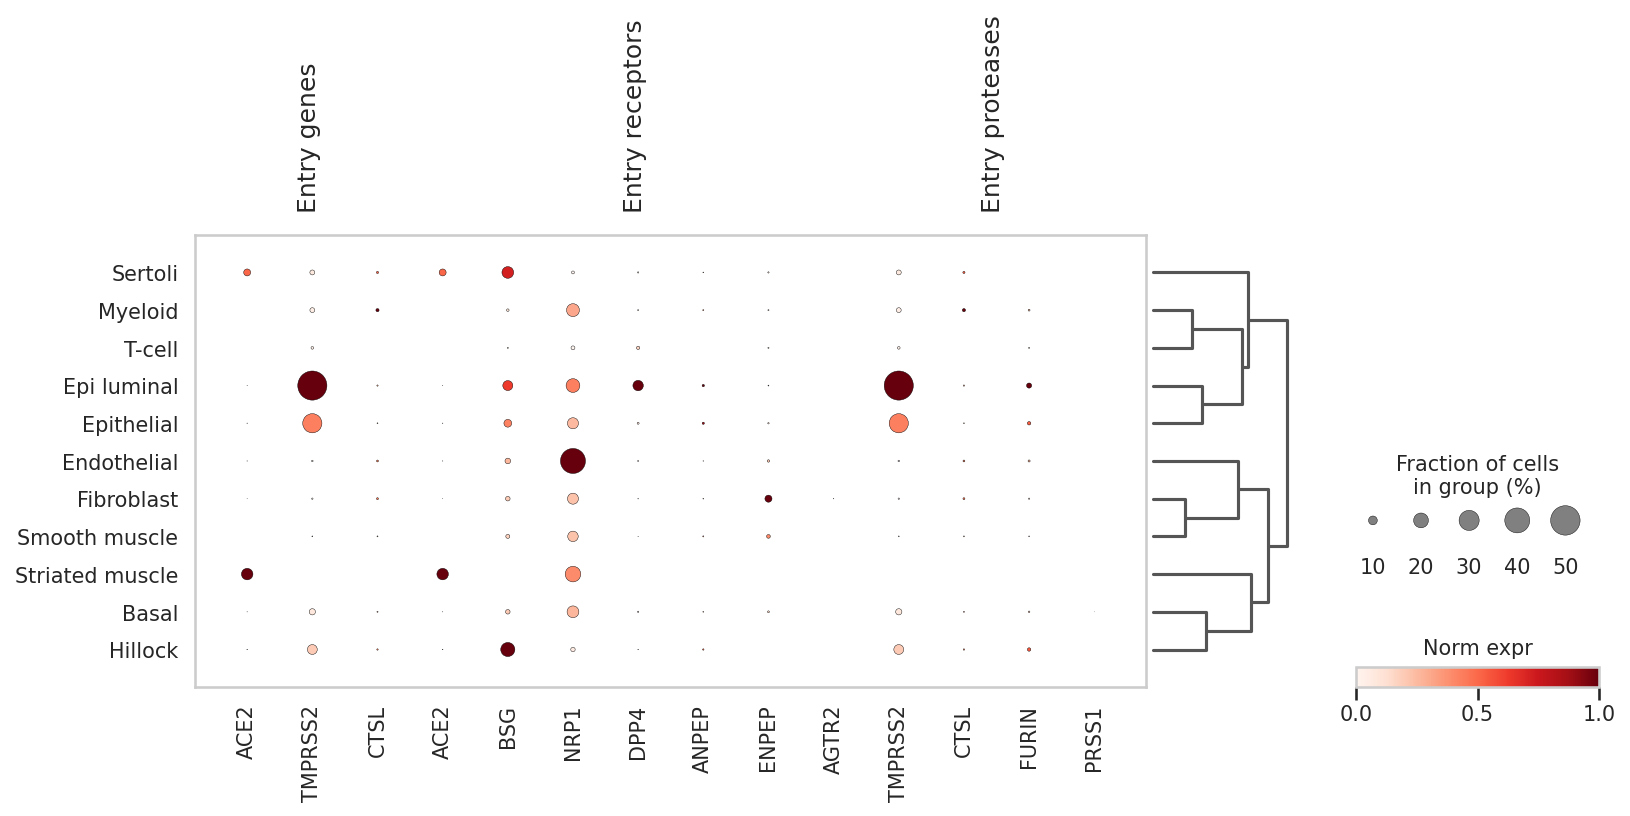

In [57]:

samples = ['liver','lung','heart','kidney','prostate']
cell_type_label = 'short_cell_type'


for s in samples: 
    FIG_PATH = '/mnt/ibm_lg/covid_tissue_atlas/figures/figure2/' + s + '/'
    sc.settings.figdir = FIG_PATH
    
    adata = sc.read_h5ad(MASTER_DIR + 'CTA_' + s + '_.h5ad')
    
    fig, (ax1) = plt.subplots(1, 1, figsize=(12,5), gridspec_kw={'wspace':0.9})
    
    sc.tl.dendrogram(adata, use_rep = 'X_scVI', groupby = cell_type_label) 
    sc.pl.dotplot(adata, 
                  var_names= utils.get_covid_genes() ,
                  layer='counts',
                  groupby=cell_type_label,
                  log=True,
                  standard_scale='var',
                  colorbar_title = 'Norm expr',
                  dendrogram=True, ax = ax1,
                  save= s + '_dotplot_COVID_genes.pdf')
    
    



## Expression of cell type markers 

         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:41)
Storing dendrogram info using `.uns['dendrogram_short_cell_type']`
categories: Endothelial, Fibroblast, Hepatocyte, etc.
var_group_labels: hepatocyte, stromal, endothelial, etc.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


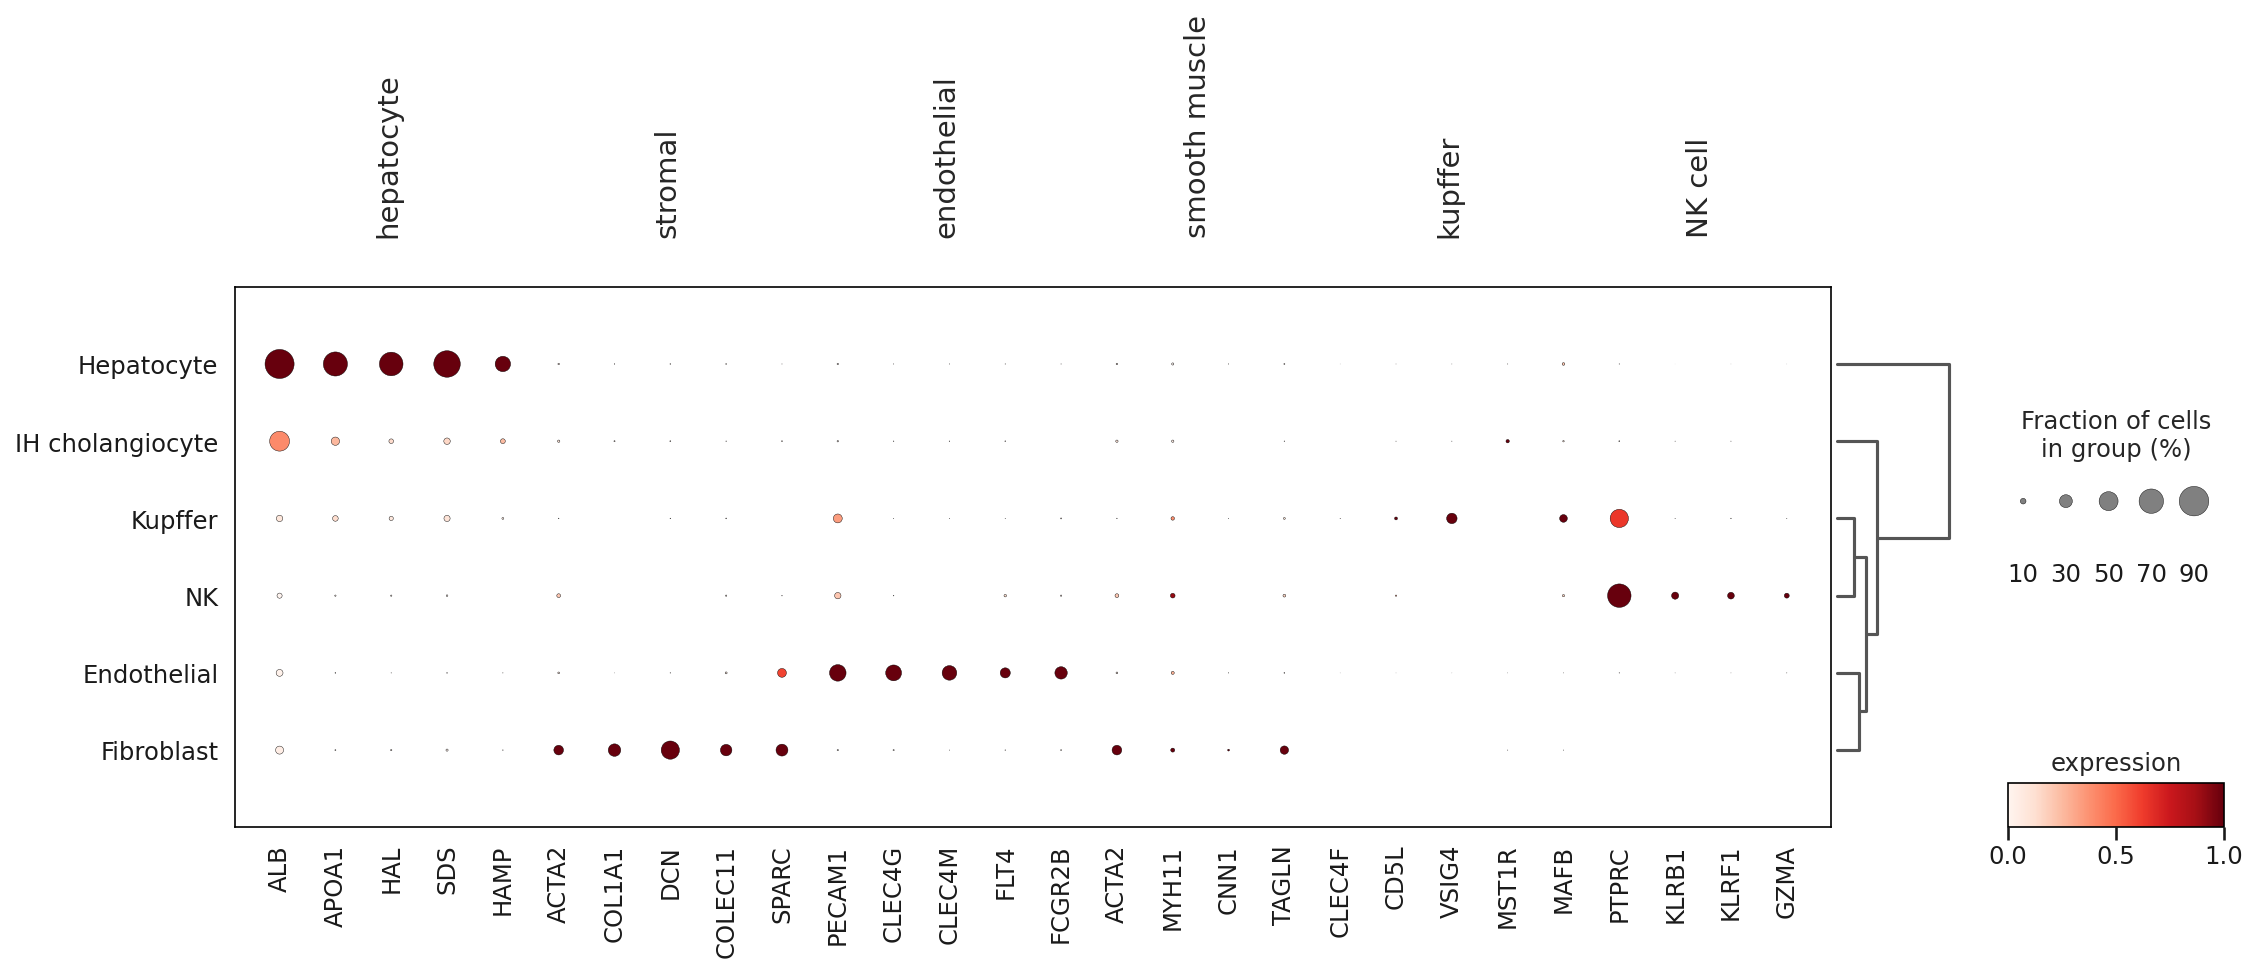

In [77]:
fig, (ax1) = plt.subplots(1, 1, figsize=(17,7), gridspec_kw={'wspace':0.9})

samples = ['liver','heart']

FIG_PATH = '/mnt/ibm_lg/covid_tissue_atlas/figures/figure2/' + s + '/'
adata = sc.read_h5ad(MASTER_DIR + 'CTA_' + samples[0] + '_.h5ad')



sc.pl.dotplot(adata, 
              var_names= utils.get_markers(samples[0]),
              layer='counts',
              groupby= cell_type_label,
              log=True,
              standard_scale='var',
              colorbar_title = 'expression',
              dendrogram=True, ax = ax1,
              save= this_sample + '_dotplot_celltype_markers.pdf')

         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:37)
Storing dendrogram info using `.uns['dendrogram_short_cell_type']`
categories: Cardiomyocyte, Endothelial, Fibroblast, etc.
var_group_labels: endothelial, cardiac muscle, fibroblast, etc.


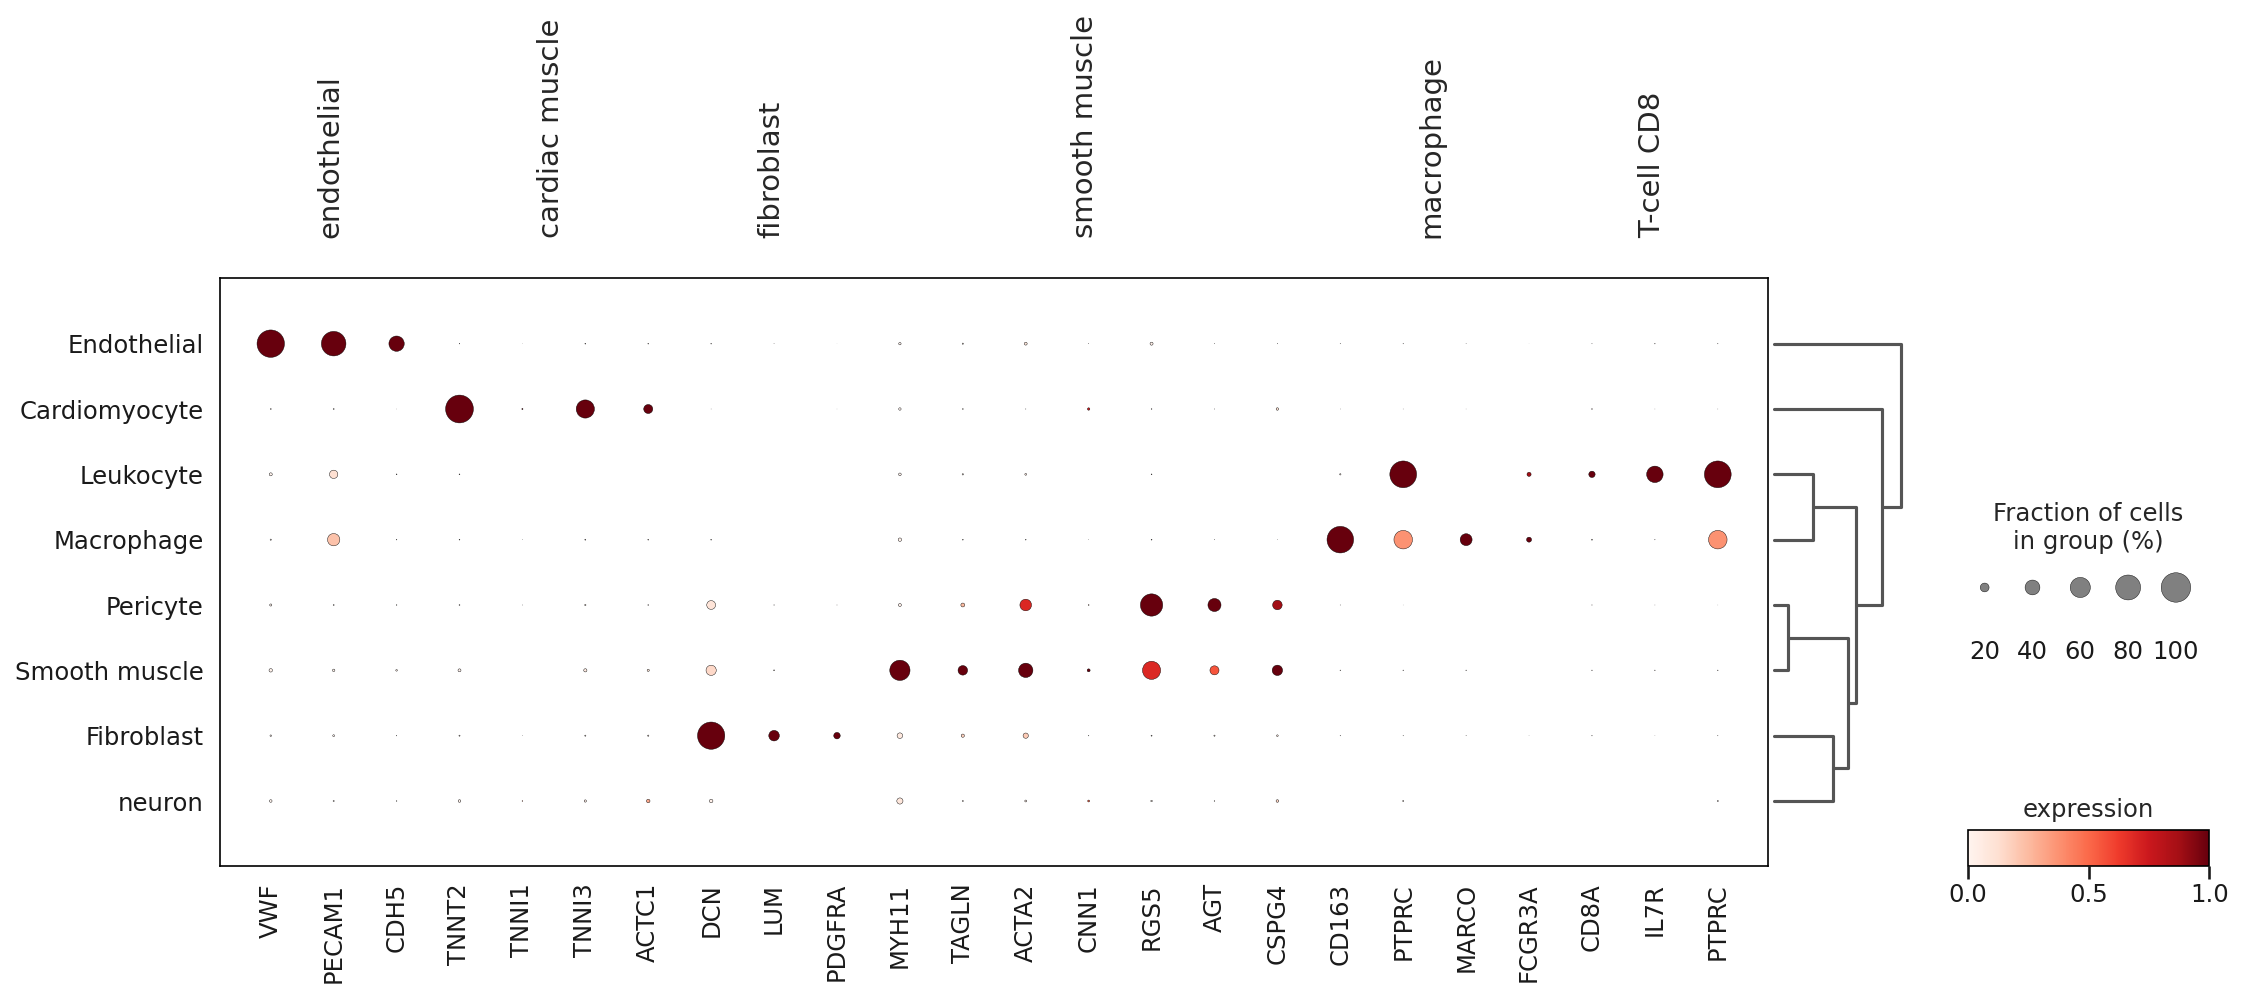

In [78]:
fig, (ax1) = plt.subplots(1, 1, figsize=(17,7), gridspec_kw={'wspace':0.9})

samples = ['liver','heart']

FIG_PATH = '/mnt/ibm_lg/covid_tissue_atlas/figures/figure2/' + s + '/'
adata = sc.read_h5ad(MASTER_DIR + 'CTA_' + samples[1] + '_.h5ad')



sc.pl.dotplot(adata, 
              var_names= utils.get_markers(samples[1]),
              layer='counts',
              groupby= cell_type_label,
              log=True,
              standard_scale='var',
              colorbar_title = 'expression',
              dendrogram=True, ax = ax1,
              save= this_sample + '_dotplot_celltype_markers.pdf')